## thyroid model validation

The purpose of this notebook is to develop a test set for google automl model

### first import modules

In [294]:
import pandas as pd
import numpy as np
import os
from collections import Counter

from sklearn.preprocessing import MultiLabelBinarizer

from IPython import display
from superintendent import ClassLabeller

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

In [6]:
os.getcwd()

'C:\\Users\\jasko\\Desktop\\machine_learning\\my_projects\\thyroid_aspiration'

### helper functions

In [201]:
def make_bargraph(df, col, title = 'bar graph', rotation = False):
    
    classes = dict(sorted(Counter(df[col]).items()))
    xlabels = [str(i) for i in list(classes.keys())]
        
    plt.bar(classes.keys(), classes.values())
    plt.title(title)
    
    if rotation:
        plt.xticks(rotation = 90)
    
    plt.xticks(xlabels)
    plt.show()
    
    
def make_bargraph2(df, col, title = 'bar graph', rotation = False, show_values = True):
    classes = OrderedDict(Counter(df[col]).most_common())

    x = classes.keys()
    y = classes.values()

    bars = plt.bar(x, y)
    xlocs, xlabs = plt.xticks()

    # reference x so you don't need to change the range each time x changes
    xlocs=[i for i in x]
    xlabs=[i for i in x]

    plt.xticks(xlocs, xlabs)
    if rotation:
        plt.xticks(rotation = 90)
        
    plt.title(title)

    if show_values:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + 0.35, yval + 1.0, yval, color= 'blue')

    plt.show()

In [236]:
def plot_heatmap(df, col1, col2,
                xlabel = 'follow up booked in idoc ...',
                ylabel = 'follow up needed',
                title = 'needed vs actual ...',
                labs = ['Y', 'N']):
    
    xlabel = col1
    ylabel = col2
    
    TP = len(df[(df[col1] == labs[0]) & (df[col2] == labs[0])])
    TN = len(df[(df[col1] == labs[1]) & (df[col2] == labs[1])])
    FP = len(df[(df[col1] == labs[0]) & (df[col2] == labs[1])])
    FN = len(df[(df[col1] == labs[1]) & (df[col2] == labs[0])])
    

    conf = np.array([[TP, FP], [FN, TN]])

    fig = sns.heatmap(conf, annot = True, fmt = 'd', cmap="YlGnBu", vmax = 550, xticklabels=labs, yticklabels=labs, cbar = True)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show(fig)

### load data

In [7]:
url1 = 'thyroid_data.csv' #''https://raw.githubusercontent.com/Jaskolk/thyroid_aspiration/main/thyroid_data.csv'
url2 = 'thyroid_data_update.csv' #''https://raw.githubusercontent.com/Jaskolk/thyroid_aspiration/main/thyroid_data_update.csv'

#### original data

In [8]:
data = pd.read_csv(url1)

In [9]:
data.head()

Hospital    PT Class Procedure End Time Procedure Sign-off  Time Modality  \
0      BCH  Outpatient    03/02/2020 9:48         03/02/2020 10:36       US   
1      BCH  Outpatient   03/02/2020 10:41         03/02/2020 12:08       US   
2      BCH  Outpatient   03/02/2020 10:36         03/02/2020 12:06       US   
3      BCH  Outpatient   03/02/2020 11:19         03/02/2020 12:07       US   
4      BCH  Outpatient   04/02/2020 10:26         04/02/2020 10:39       US   

   Procedure #        Procedure Name Mode Grouping   Accession         MRN  \
0       7893.0  ASPIRATION - THYROID            US  15995314.0  N000895092   
1       7893.0  ASPIRATION - THYROID            US  15995463.0  N000885031   
2       7893.0  ASPIRATION - THYROID            US  15995472.0  N000691085   
3       7893.0  ASPIRATION - THYROID            US  15995493.0  N000021506   
4       7893.0  ASPIRATION - THYROID            US  15998039.0  N000386598   

  Patient Account # Health Card +Version         DOB  Age at Procedure Date  \
0      0NX075968/19        1655789590-AT  06/11/1967                   53.0   
1      0NX075992/19        2064714070-AW  10/02/1997                   23.0   
2      0NX075987/19        8316472276-HW  22/05/1953                   67.0   
3      0NX075991/19                  NaN  26/02/1952                   68.0   
4      0NX076298/19        3188415867-XN  22/05/1950                   70.0   

   P FEE  T Fee Sign off Rad  \
0  60.55   94.6   FITZGERALD   
1  60.55   94.6   FITZGERALD   
2  60.55   94.6   FITZGERALD   
3  60.55   94.6   FITZGERALD   
4  60.55   94.6        SEGAL   

                                         Exam Result labels  
0  FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request ...      1  
1  FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request ...      1  
2  FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request ...      2  
3  FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request ...      1  
4  .\r\n\r\nFNA BIOPSY OF THYROID\r\n\r\nHISTORY:...      1

In [200]:
data2[data2['Procedure Name'] == 'ASP-ADD SITE']

Hospital     PT Clas      Ordered Time Procedure Begin Time  \
21       BCH  Outpatient  10/02/2020 11:19     10/02/2020 11:21   
25       BCH  Outpatient  11/02/2020 11:33     11/02/2020 11:34   
31       BCH  Outpatient  12/02/2020 11:39     12/02/2020 11:39   
53       BCH  Outpatient  21/02/2020 12:10     21/02/2020 12:10   
57       BCH  Outpatient  24/02/2020 11:17     24/02/2020 11:18   
58       BCH  Outpatient  24/02/2020 11:17     24/02/2020 11:18   
62       BCH  Outpatient  25/02/2020 12:32     25/02/2020 12:34   
94       BCH  Outpatient  11/03/2020 12:01     11/03/2020 12:02   
123      BCH   Inpatient  02/06/2020 12:08     02/06/2020 12:10   
126      BCH  Outpatient  03/06/2020 11:46     03/06/2020 11:46   
128      BCH   Inpatient  04/06/2020 12:03     04/06/2020 12:05   
131      BCH   Inpatient  11/06/2020 11:26     11/06/2020 11:27   
162      BCH  Outpatient  30/06/2020 13:48     30/06/2020 14:29   
204      BCH  Outpatient  24/07/2020 11:59     24/07/2020 11:59   
231      BCH  Outpatient  06/08/2020 10:56     06/08/2020 10:58   
232      BCH  Outpatient   07/08/2020 7:33      07/08/2020 7:36   
236      BCH  Outpatient   10/08/2020 9:12      10/08/2020 9:13   
239      BCH  Outpatient  10/08/2020 10:16     10/08/2020 10:17   
242      BCH  Outpatient  11/08/2020 12:48     11/08/2020 12:50   
243      BCH  Outpatient  11/08/2020 12:57     11/08/2020 12:58   
252      BCH  Outpatient  14/08/2020 11:53     14/08/2020 11:54   
262      BCH  Outpatient  19/08/2020 11:31     19/08/2020 11:33   
270      BCH  Outpatient  21/08/2020 11:29     21/08/2020 11:30   
296      BCH  Outpatient  02/09/2020 15:21     02/09/2020 15:21   
312      BCH  Outpatient  09/09/2020 14:27     08/09/2020 14:27   
313      BCH  Outpatient  09/09/2020 14:44     09/09/2020 14:45   
348      BCH  Outpatient  21/09/2020 12:09     21/09/2020 12:10   
371      BCH  Outpatient  30/09/2020 11:49     30/09/2020 11:51   
377      BCH  Outpatient  01/10/2020 11:26     01/10/2020 11:27   
388      BCH  Outpatient  06/10/2020 10:35     06/10/2020 13:18   
393      BCH  Outpatient  07/10/2020 11:29     07/10/2020 11:29   
399      BCH  Outpatient  09/10/2020 11:20     09/10/2020 11:21   
408      BCH  Outpatient  14/10/2020 11:30     14/10/2020 11:32   
415      BCH  Outpatient  15/10/2020 11:52     15/10/2020 11:53   
419      BCH  Outpatient  16/10/2020 10:54     16/10/2020 10:58   
455      BCH  Outpatient  28/10/2020 11:38     28/10/2020 11:39   
476      BCH  Outpatient  04/11/2020 12:00     04/11/2020 12:05   
477      BCH  Outpatient  04/11/2020 12:00     04/11/2020 12:05   
480      BCH  Outpatient   05/11/2020 9:44      05/11/2020 9:46   
484      BCH  Outpatient  05/11/2020 12:11     05/11/2020 12:13   
498      BCH  Outpatient  10/11/2020 10:55     10/11/2020 10:56   
503      BCH  Outpatient   12/11/2020 9:26     12/11/2020 10:14   
533      BCH  Outpatient  24/11/2020 11:55     24/11/2020 11:57   
539      BCH  Outpatient  25/11/2020 11:25     25/11/2020 11:27   
542      BCH  Outpatient  26/11/2020 12:02     26/11/2020 12:04   
580      BCH  Outpatient  14/12/2020 12:10     14/12/2020 12:10   
584      BCH  Outpatient  15/12/2020 11:26     15/12/2020 11:31   
589      BCH  Outpatient  16/12/2020 12:19     16/12/2020 12:21   
592      BCH  Outpatient  17/12/2020 10:22     17/12/2020 10:24   
721      BCH  Outpatient   05/03/2021 9:53      05/03/2021 9:53   

    Procedure End Time Procedure Sign-off  Time Modality  Procedure #  \
21    10/02/2020 11:21         10/02/2020 12:39       US       7076.0   
25    11/02/2020 11:34         11/02/2020 12:24       US       7076.0   
31    12/02/2020 11:39         12/02/2020 16:17       US       7076.0   
53    21/02/2020 12:10         21/02/2020 12:42       US       7076.0   
57    24/02/2020 11:18         24/02/2020 12:24       US       7076.0   
58    24/02/2020 11:18         24/02/2020 12:24       US       7076.0   
62    25/02/2020 12:34         25/02/2020 13:22       US       7076.0   
94

In [10]:
data['Date'] = pd.to_datetime(data['Procedure End Time'], infer_datetime_format = True).dt.date

#### updated data

In [13]:
data2 = pd.read_csv(url2)

In [14]:
data2.head()

Hospital     PT Clas     Ordered Time Procedure Begin Time  \
0      BCH  Outpatient  03/02/2020 9:12      03/02/2020 9:48   
1      BCH  Outpatient  03/02/2020 9:53     03/02/2020 10:41   
2      BCH  Outpatient  03/02/2020 9:47     03/02/2020 10:36   
3      BCH  Outpatient  03/02/2020 9:52     03/02/2020 11:19   
4      BCH  Outpatient  04/02/2020 9:20     04/02/2020 10:26   

  Procedure End Time Procedure Sign-off  Time Modality  Procedure #  \
0    03/02/2020 9:48         03/02/2020 10:36       US       7893.0   
1   03/02/2020 10:41         03/02/2020 12:08       US       7893.0   
2   03/02/2020 10:36         03/02/2020 12:06       US       7893.0   
3   03/02/2020 11:19         03/02/2020 12:07       US       7893.0   
4   04/02/2020 10:26         04/02/2020 10:39       US       7893.0   

         Procedure Name Mode Grouping   Accession         MRN  \
0  ASPIRATION - THYROID            US  15995314.0  N000895092   
1  ASPIRATION - THYROID            US  15995463.0  N000885031   
2  ASPIRATION - THYROID            US  15995472.0  N000691085   
3  ASPIRATION - THYROID            US  15995493.0  N000021506   
4  ASPIRATION - THYROID            US  15998039.0  N000386598   

  Patient Account # Health Card +Version         DOB  Age at Procedure Date  \
0      0NX075968/19        1655789590-AT  06/11/1967                   53.0   
1      0NX075992/19        2064714070-AW  10/02/1997                   23.0   
2      0NX075987/19        8316472276-HW  22/05/1953                   67.0   
3      0NX075991/19                  NaN  26/02/1952                   68.0   
4      0NX076298/19        3188415867-XN  22/05/1950                   70.0   

   P FEE  T Fee Sign off Rad  \
0  60.55   94.6   FITZGERALD   
1  60.55   94.6   FITZGERALD   
2  60.55   94.6   FITZGERALD   
3  60.55   94.6   FITZGERALD   
4  60.55   94.6        SEGAL   

                                         Exam Result  
0  FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request ...  
1  FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request ...  
2  FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request ...  
3  FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request ...  
4  .\r\n\r\nFNA BIOPSY OF THYROID\r\n\r\nHISTORY:...

In [15]:
data2['Date'] = pd.to_datetime(data2['Procedure End Time'], infer_datetime_format = True).dt.date

In [17]:
data.shape, data2.shape

((652, 20), (750, 21))

### basic EDA

In [20]:
data['P FEE'].sum(), data2['P FEE'].sum()

(39478.6, 42385.0)

In [21]:
data['T Fee'].sum(), data2['T Fee'].sum()

(61679.20000000001, 66220.00000000001)

In [22]:
Counter(data2['Procedure Name']), Counter(data['Procedure Name'])

(Counter({'ASPIRATION - THYROID': 700, 'ASP-ADD SITE': 50}),
 Counter({'ASPIRATION - THYROID': 652}))

In [23]:
Counter(data.labels)

Counter({'1': 533, '2': 109, '>2': 10})

### get rid of extra rows from new dataset

In [24]:
max(data.Date), max(data2.Date)

(datetime.date(2021, 12, 2), datetime.date(2021, 12, 3))

In [26]:
dates = data.Date

data3 = data2[data2.Date.isin(dates)]

In [27]:
data.shape, data2.shape, data3.shape

((652, 20), (750, 21), (702, 21))

In [31]:
max(data.Date) == max(data3.Date),min(data.Date) == min(data3.Date),set(data.Date) == set(data3.Date)

(True, True, True)

I would like to have a dataset which is the rows removed from the new extract to be the test set

In [187]:
data_test = data2[~data2.Date.isin(dates)]

In [188]:
data_test.shape

(48, 21)

In [190]:
data_test.to_csv('thyrod_test_data.csv', index = False)

so now I have data3 which has the same date range as the original dataset, but extra rows because of the addition of new extra asp code

In [32]:
data_m = data.merge(data3[['MRN', 'Date', 'Procedure Name', 'Accession', 'Exam Result']], on = ['MRN', 'Date', 'Procedure Name', 'Accession'], how= 'right')

In [33]:
data_m.shape

(702, 21)

In [34]:
Counter(data.labels), Counter(data_m.labels)

(Counter({'1': 533, '2': 109, '>2': 10}),
 Counter({'1': 533, '2': 109, '>2': 10, nan: 50}))

In [35]:
Counter(data3['Procedure Name']), Counter(data_m['Procedure Name'])

(Counter({'ASPIRATION - THYROID': 653, 'ASP-ADD SITE': 49}),
 Counter({'ASPIRATION - THYROID': 653, 'ASP-ADD SITE': 49}))

In [36]:
data_m.columns

Index(['Hospital', 'PT Class', 'Procedure End Time',
       'Procedure Sign-off  Time', 'Modality', 'Procedure #', 'Procedure Name',
       'Mode Grouping', 'Accession', 'MRN', 'Patient Account #',
       'Health Card +Version', 'DOB', 'Age at Procedure Date', 'P FEE',
       'T Fee', 'Sign off Rad', 'Exam Result_x', 'labels', 'Date',
       'Exam Result_y'],
      dtype='object')

In [37]:
data_m = data_m[['Procedure #', 'Procedure Name','Accession', 'MRN', 'P FEE',
       'T Fee', 'labels', 'Date', 'Exam Result_x', 'Exam Result_y']]

In [38]:
data_m['same day bx'] = 1

In [39]:
data_m.columns

Index(['Procedure #', 'Procedure Name', 'Accession', 'MRN', 'P FEE', 'T Fee',
       'labels', 'Date', 'Exam Result_x', 'Exam Result_y', 'same day bx'],
      dtype='object')

still don't have want I want.  essentially I think I need to one hot encode the procedure column

maybe a pivot table?

In [117]:
agg_dict = {'Procedure Name': lambda x: x.tolist(),
            'labels':lambda x: x.tolist()[0],
            'T Fee': 'sum',
            'P FEE': 'sum',
            'same day bx':'sum',
            'Exam Result_x':lambda x: x.tolist(),
            'Exam Result_y':lambda x: x.tolist()}

In [118]:
data_p = (data_m.groupby(['MRN','Date'])
      .agg(agg_dict)
      .reset_index())

In [120]:
data_p.head()

MRN        Date          Procedure Name labels  T Fee  P FEE  \
0  N000002845  2020-10-02  [ASPIRATION - THYROID]      1   94.6  60.55   
1  N000004564  2021-09-02  [ASPIRATION - THYROID]      1   94.6  60.55   
2  N000005217  2020-08-18  [ASPIRATION - THYROID]      1   94.6  60.55   
3  N000006969  2020-10-11  [ASPIRATION - THYROID]      1   94.6  60.55   
4  N000006969  2020-10-13  [ASPIRATION - THYROID]      2   94.6  60.55   

   same day bx                                      Exam Result_x  \
0            1  [Using sterile technique and under ultrasound ...   
1            1  [FNA BIOPSY OF THYROID\r\n\r\n Correlation is ...   
2            1  [HISTORY: FNA of a solid nodule in the lower p...   
3            1  [FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request...   
4            1  [.\r\n\r\nFNA BIOPSY OF THYROID\r\n\r\nHISTORY...   

                                       Exam Result_y  
0  [Using sterile technique and under ultrasound ...  
1  [FNA BIOPSY OF THYROID\r\n\r\n Correlation is ...  
2  [HISTORY: FNA of a solid nodule in the lower p...  
3  [FNA BIOPSY OF THYROID\r\n\r\nHISTORY: Request...  
4  [.\r\n\r\nFNA BIOPSY OF THYROID\r\n\r\nHISTORY...

In [127]:
#622 encounters with 577 patients
data_p.shape, len(set(data_p.MRN))

((662, 9), 577)

In [138]:
Counter(data_p.labels)

Counter({'1': 533, '2': 109, nan: 11, '>2': 9})

In [139]:
# Binarise labels
mlb = MultiLabelBinarizer()
expandedLabelData = mlb.fit_transform(data_p["Procedure Name"])  #array with column 1 being 'ASP-ADD SITE', column 2 being labels for 'ASPIRATION - THYROID'
labelClasses = mlb.classes_
print (labelClasses)


data_p[labelClasses[0]] = expandedLabelData[:,0]
data_p[labelClasses[1]] = expandedLabelData[:,1]
data_p['num biopsies in ris'] = data_p['ASP-ADD SITE'] + data_p['ASPIRATION - THYROID']

['ASP-ADD SITE' 'ASPIRATION - THYROID']


In [142]:
Counter(data_p['num biopsies in ris']), Counter(data_p['same day bx'])

(Counter({1: 625, 2: 37}), Counter({1: 623, 2: 38, 3: 1}))

In [163]:
#some of the reports are empty and some are dupes.  compbining for labelling

def create_combo_result(s):
    if type(s['Exam Result_x'][0]) == float: return s['Exam Result_y'][0]
    if s['Exam Result_x'][0] == s['Exam Result_y'][0]: return s['Exam Result_y'][0]
    else: return s['Exam Result_x'][0] + '\n--------------------------\n' + s['Exam Result_y'][0]

data_p['Exam Result'] = data_p.apply(create_combo_result, axis =1)

### gotta label the missing rows now

In [171]:
Counter(data_p.labels)

Counter({'1': 533, '2': 109, nan: 11, '>2': 9})

In [172]:
data_p['labels'] = data_p['labels'].replace({np.nan:None})

In [173]:
labelling_widget = ClassLabeller(
    features=data_p['Exam Result'],
    labels = data_p['labels'],
    display_func=lambda x: display.display(display.Markdown(x)),
    options=[ '1', '2', '>2'],
)

labelling_widget

ClassLabeller(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1.0),)), Box(chil…

In [174]:
data_p['labels'] = labelling_widget.new_labels
Counter(data_p['labels'])

Counter({'1': 533,
         '2': 112,
         'not thyroid': 6,
         '>2': 9,
         'not biopsy': 1,
         'unclear': 1})

In [175]:
data_p = data_p[data_p['labels'] != 'not thyroid']
data_p = data_p[data_p['labels'] != 'not biopsy']

trying to label the row that is "unclear"

In [178]:
data_p[data_p.labels == 'unclear']

MRN        Date  Procedure Name   labels  T Fee  P FEE  \
213  N000242751  2020-06-30  [ASP-ADD SITE]  unclear    0.0    0.0   

     same day bx Exam Result_x          Exam Result_y  ASP-ADD SITE  \
213            1         [nan]  [See combined report]             1   

     ASPIRATION - THYROID  num biopsies in ris          Exam Result  
213                     0                    1  See combined report

In [182]:
data2[data2.MRN == 'N000242751']

Hospital     PT Clas      Ordered Time Procedure Begin Time  \
162      BCH  Outpatient  30/06/2020 13:48     30/06/2020 14:29   

    Procedure End Time Procedure Sign-off  Time Modality  Procedure #  \
162   30/06/2020 14:29         30/06/2020 14:31       US       7076.0   

    Procedure Name Mode Grouping  ...         MRN Patient Account #  \
162   ASP-ADD SITE            US  ...  N000242751      0NX011184/20   

    Health Card +Version         DOB Age at Procedure Date  P FEE  T Fee  \
162        7485669282-LN  10/09/1972                  48.0    0.0    0.0   

     Sign off Rad          Exam Result        Date  
162       GANGULI  See combined report  2020-06-30  

[1 rows x 21 columns]

but no luck...

In [183]:
#one row doesn't have a report at all so it's not labelled
data_p = data_p[data_p['labels'] != 'unclear']

In [184]:
#now I have 654 labelled events
data_p.shape

(654, 13)

In [185]:
Counter(data_p.labels),Counter(data_p['num biopsies in ris']), Counter(data_p['same day bx'])

(Counter({'1': 533, '2': 112, '>2': 9}),
 Counter({1: 617, 2: 37}),
 Counter({1: 616, 2: 37, 3: 1}))

In [194]:
label_mapping = {'1': '1', '2': '>1', '>2': '>1'}
data_p['report labels'] = data_p['labels'].map({'1': '1', '2': '>1', '>2': '>1'})
data_p['ris labels'] = data_p['num biopsies in ris'].map({1: '1', 2: '>1'})

In [195]:
Counter(data_p['ris labels']),Counter(data_p['report labels']),

(Counter({'1': 617, '>1': 37}), Counter({'1': 533, '>1': 121}))

In [242]:
data_p.count()

MRN                     654
Date                    654
Procedure Name          654
labels                  654
T Fee                   654
P FEE                   654
same day bx             654
Exam Result_x           654
Exam Result_y           654
ASP-ADD SITE            654
ASPIRATION - THYROID    654
num biopsies in ris     654
Exam Result             654
report labels           654
ris labels              654
dtype: int64

In [248]:
ris_count = Counter(data_p['ris labels'])
report_count = Counter(data_p['report labels'])

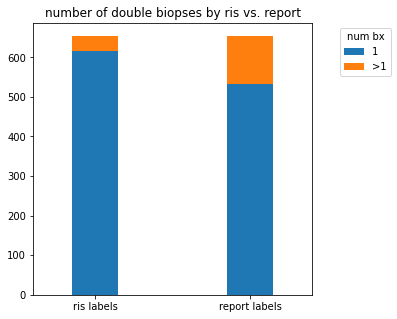

In [293]:
counts = data_p[['ris labels', 'report labels']].apply(lambda x: x.value_counts()).transpose()
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
counts.plot(ax =ax, kind='bar', stacked=True, rot=0, width = 0.3)
vals = ax.get_yticks()
#ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
#ax.yaxis.grid(True)
#ax.set_axisbelow(True)

plt.title('number of double biopses by ris vs. report')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.3 , 1.0), title = 'num bx')
plt.show()

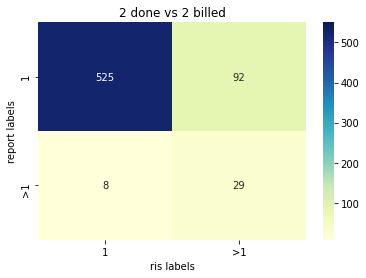

In [238]:

plot_heatmap(data_p,  'ris labels', 'report labels', title = '2 done vs 2 billed', labs = ['1', '>1'])

In [ ]:
needs_fu = data[data['needs f/u'] == 'Y']
booked_fu = data[data['f/u in idoc'] == 'Y']
#needed_booked_fu = data[data['needed screening f/u in idoc'] == 'Y']
plt.figure(figsize = (4,4))
set1 = set(needs_fu.index)
set2 = set(booked_fu.index)
#set3 = set(needed_booked_fu.index)

venn2([set1,set2], set_labels = ('needs f/u','f/u booked'))
plt.title('Pattern of follow up bookings')
plt.show()

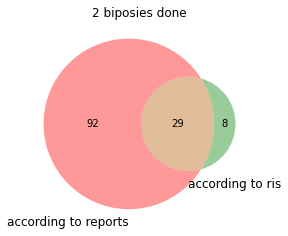

In [297]:
report_2 = data_p[data_p['report labels'] == '>1']
ris_2 = data_p[data_p['ris labels'] == '>1']
#needed_booked_fu = data[data['needed screening f/u in idoc'] == 'Y']
plt.figure(figsize = (4,4))
set1 = set(report_2.index)
set2 = set(ris_2.index)
#set3 = set(needed_booked_fu.index)

venn2([set1,set2], set_labels = ('according to reports','according to ris'))
plt.title('2 biposies done')
plt.show()